In [1]:
import pandas as pd
import geopandas as gpd
import mapclassify as mc
from matplotlib import pyplot as plt
import matplotlib.colors as colors


In [2]:
dataset = pd.read_pickle('../../geodata/results/01_master_building_dataset.pkl')

In [3]:
plt.rcParams['svg.fonttype'] = 'none'

In [4]:
#IMPORT ADMINISTRATION BOUNDARIES
ch_g2g18  = gpd.read_file('../../geodata/ch_districts/ch_districts_g2g18.gpkg')
ch_lakes = gpd.read_file('../../geodata/ch_lakes/ch_lakes.gpkg')

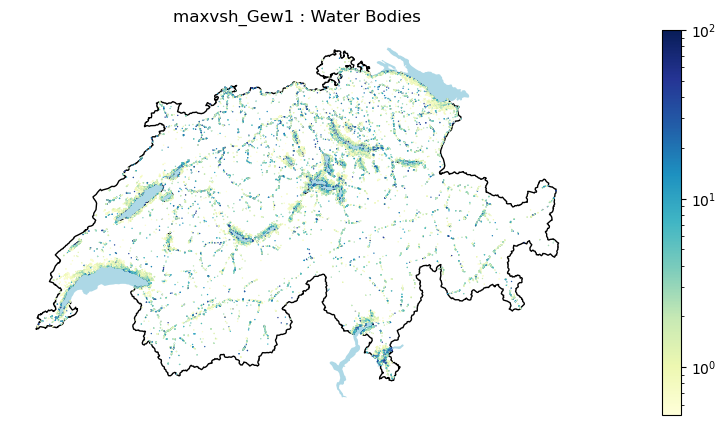

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5))

# normalize color
sel_feat = 'maxvsh_Gew1'
df = dataset.query('maxvsh_Gew1 > .5').sample(100000)
# df = vsh_data.query('Agglo_Name == ["Genève","Lausanne","Vevey\xa0–\xa0Montreux"]').sample(150000)#.query('TYP_001 == "CEN"')
# df = vsh_data.query('Agglo_Name == "Zürich"').sample(150000)#.query('NAME == "Grosszentren"')

df[sel_feat] += .01

vmin, vmax, vcenter = df[sel_feat].min(), df[sel_feat].max(), df[sel_feat].median()

# norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
norm = colors.LogNorm(vmin=vmin, vmax=vmax)
ch_g2g18.dissolve().plot(facecolor = 'none', edgecolor = 'black', ax = ax)
ch_lakes.dissolve().plot(facecolor = 'lightblue', ax = ax)
df.plot(sel_feat, cmap = 'YlGnBu', edgecolor='none',
        norm = norm,
        markersize = 1,
        ax=ax,
        legend=True);
plt.title(f'{sel_feat} : Water Bodies');
plt.axis('off');

# fig.savefig('output_png/ch_maxVSH_lake.eps', format='eps')

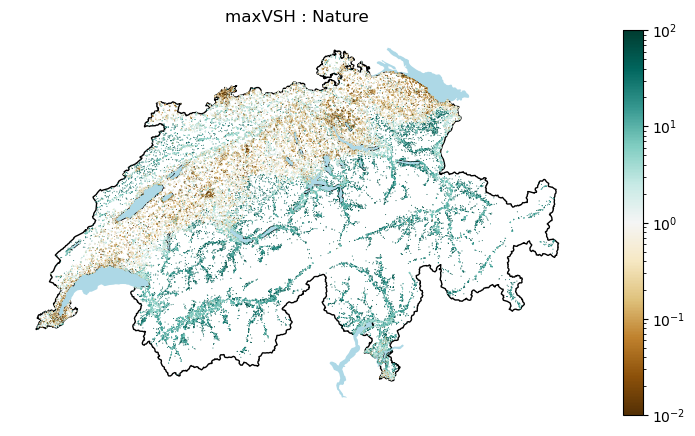

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# normalize color
sel_feat = 'maxvsh_Nat3'
df = dataset.sample(1000000)
df[sel_feat] += .01

vmin, vmax, vcenter = df[sel_feat].min(), df[sel_feat].max(), df[sel_feat].median()

# norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
norm = colors.LogNorm(vmin=vmin, vmax=vmax)
ch_g2g18.dissolve().plot(facecolor = 'none', edgecolor = 'black', ax = ax)
ch_lakes.dissolve().plot(facecolor = 'lightblue', ax = ax)
df.plot(sel_feat, cmap = 'BrBG', edgecolor='none',
        norm = norm,
        markersize = .5,
        ax=ax,
        legend=True);
plt.title('maxVSH : Nature');
plt.axis('off');

# fig.savefig('output_png/ch_maxVSH_nature.eps', format='eps')

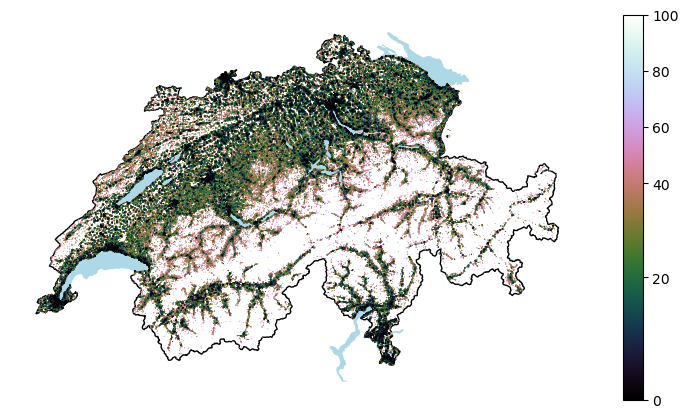

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# normalize color
sel_feat = 'snt_Pos'
df = dataset.sample(1000000)
df = df.sort_values(by = sel_feat, ascending = False)#[sel_feat] += df[sel_feat]

vmin, vmax, vcenter = df[sel_feat].min(), df[sel_feat].max(), df[sel_feat].median()

norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax = vmax)
# norm = colors.LogNorm(vmin=vmin, vmax=vmax)
ch_g2g18.dissolve().plot(facecolor = 'none', edgecolor = 'black', ax = ax)
ch_lakes.dissolve().plot(facecolor = 'lightblue', ax = ax)

df.plot(sel_feat, cmap = 'cubehelix', edgecolor='none',
        norm = norm,
        markersize = .5,
        ax=ax,
        legend=True);
# plt.title('visual config : ' + sel_feat);
plt.axis('off');

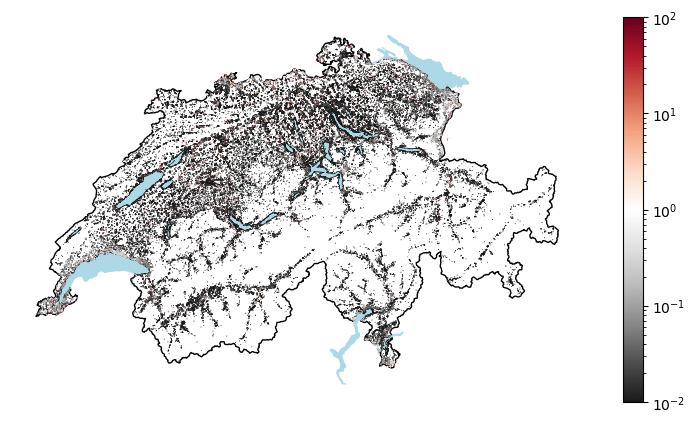

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# normalize color
sel_feat = 'maxvsh_Abb7'
df = dataset.sample(100000)
df = df.sort_values(by = sel_feat)#[sel_feat] += df[sel_feat]
df[sel_feat] += .01
vmin, vmax, vcenter = df[sel_feat].min(), df[sel_feat].max(), df[sel_feat].median()

# norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax = vmax)
norm = colors.LogNorm(vmin=vmin, vmax=vmax)
ch_g2g18.dissolve().plot(facecolor = 'none', edgecolor = 'black', ax = ax)
ch_lakes.dissolve().plot(facecolor = 'lightblue', ax = ax)

df.plot(sel_feat, cmap = 'RdGy_r', edgecolor='none',
        norm = norm,
        markersize = .5,
        ax=ax,
        legend=True);
# plt.title('visual config : ' + sel_feat);
plt.axis('off');